# p-value calculation from Normal Distribution

* [p-value calculation method](https://stats.stackexchange.com/questions/543925)

In [1]:
import random
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

# HDD MTTF distribution

<img src="image/what_is_p_value.jpg" aligh="left"/>

In [2]:
H0 = np.array([1] * 10000 + [2] * 25000 + [3] * 4000 + [4] * 3000 + [5] * 20000)
np.random.shuffle(H0)

u = np.mean(H0)
sd = np.std(H0)
print(f"mean {u:.2f} std {sd:.2f}")

mean 2.97 std 1.54


# Sampling from H0

In [3]:
def sample_means(a, N = 10000):
    means = []
    for i in range(N):
        means.append(np.mean(np.random.choice(a=a, size=100, replace=False)))
    return np.array(means)

In [4]:
means = sample_means(H0, 500000)

In [9]:
su = np.mean(means)
ssd = np.std(means)
print(f"sampled: mean {sm:.2f} sd {ssd:.2f}")

sampled: mean 2.97 sd 0.15


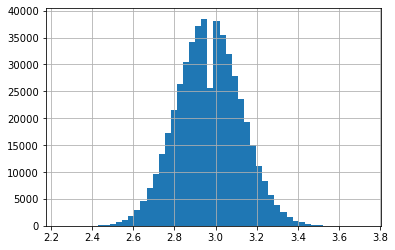

In [6]:
plt.hist(means, bins=50)
plt.grid()

# $P(3.2|H_0)$

In [7]:
means[(means >= 3.2)].size / means.size

0.071136

## ND CDF

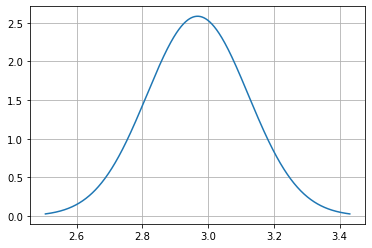

In [10]:
p = scipy.stats.norm(loc=sm, scale=ssd)

x = np.linspace(su - 3*ssd, su + 3*ssd, 1000)
plt.plot(x, p.pdf(x))
plt.grid()

In [11]:
p.cdf(np.inf)

1.0

In [12]:
def p_value(m):
    return 1 - p.cdf(m)

In [13]:
p_value(3.2)

0.06606687348283569